# Опит за подобряване на резултата постигнат от Стефан Кънев в 
# Titanic: Machine Learning from Disaster състезание в kaggle.

## Опитът за подобряването на резултата ще премине през следните стъпки:
### - Exploratory data analysis:
        - Зареждане на данните и кратко разглеждане на информацията, която се съдържа в тях.
        - Почистване на данните при нужда.
        - Визуализиция на данните под формата на графики и таблици с цел намерина на зависимости
### - Future engineering
### - Modelling
        - Създаване на модел и настройка на неговите хиперпараметри до постигането на целта.

# Exploratory data analysis

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

In [220]:
train_data = pd.read_csv('file:///D:/Machine Learning/Kaggle/Titanic/train.csv')
test_data = pd.read_csv('file:///D:/Machine Learning/Kaggle/Titanic/test.csv')

In [221]:
train_data.shape

(891, 12)

In [222]:
test_data.shape

(418, 11)

In [223]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [224]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Miss. Ebba Iris Alfrida",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [225]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [227]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Имаме липсващи данни и в двата сета. Липсващите Embarked ще запълним с най често срещания.

In [228]:
train_data.Embarked =train_data.Embarked.fillna(train_data.Embarked.value_counts().index[0])

Нека сега попълним Age

In [229]:
combined = train_data.append(test_data)
combined.shape

(1309, 12)

In [230]:
combined['Title'] = combined.Name.str.extract('([A-Za-z]+)\.', expand=False)
combined.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Mme           1
Lady          1
Sir           1
Don           1
Countess      1
Dona          1
Jonkheer      1
Name: Title, dtype: int64

In [231]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
combined['Title'] = combined.Title.map(Title_Dictionary)
combined.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [232]:
title_age_mean = combined.groupby('Title').Age.mean()
for title in title_age_mean.index.values:
    combined.loc[(combined.Title == title) & (combined.Age.isnull()), 'Age'] = title_age_mean[title]
combined.Age.isnull().sum()

0

In [233]:
combined.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             1
dtype: int64

In [234]:
combined[combined.Title.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
759,33.0,B77,S,86.5,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,760,1,female,0,1.0,110152,NaN


In [235]:
combined.Title = combined.Title.fillna('Royalty')

In [236]:
combined.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

Липсващите стойности за Cabin и Fare ще ингорираме за сега.

## Нека анализираме някой от атрибутите

# Age 

In [237]:
train_data = combined.iloc[0:891, :]
train_data.shape

(891, 13)

C:\Users\Simeon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


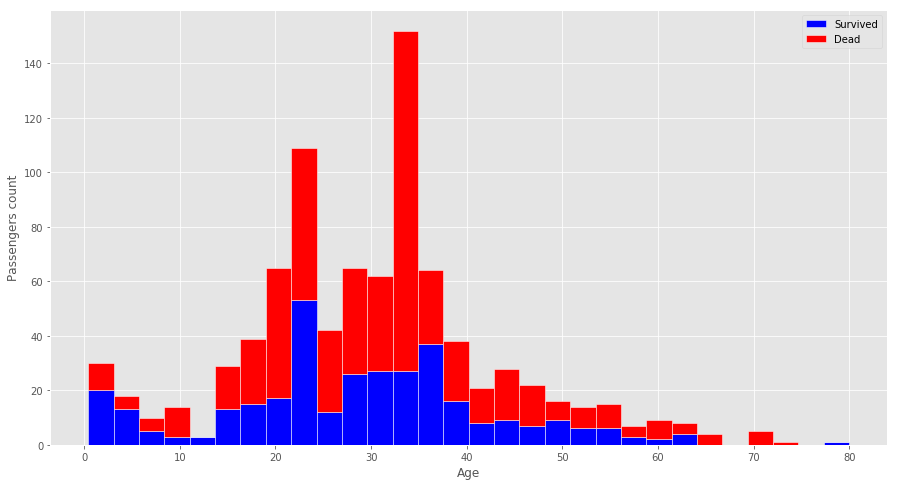

In [238]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_data[train_data['Survived']==1]['Age'], train_data[train_data['Survived']==0]['Age']],edgecolor='white', stacked=True, color =['b', 'r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel('Age')
plt.ylabel('Passengers count')
plt.legend()
plt.show()

Виждаме, че има връзка между възрастта и оцеляването.

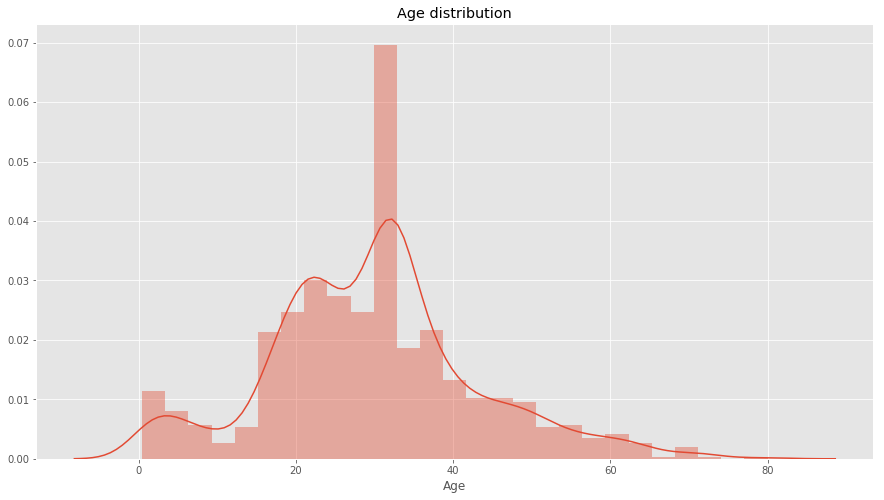

In [239]:
plt.figure(figsize=(15,8))
sns.distplot(train_data.Age)
plt.title("Age distribution")
plt.show()

## Pclass

In [240]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

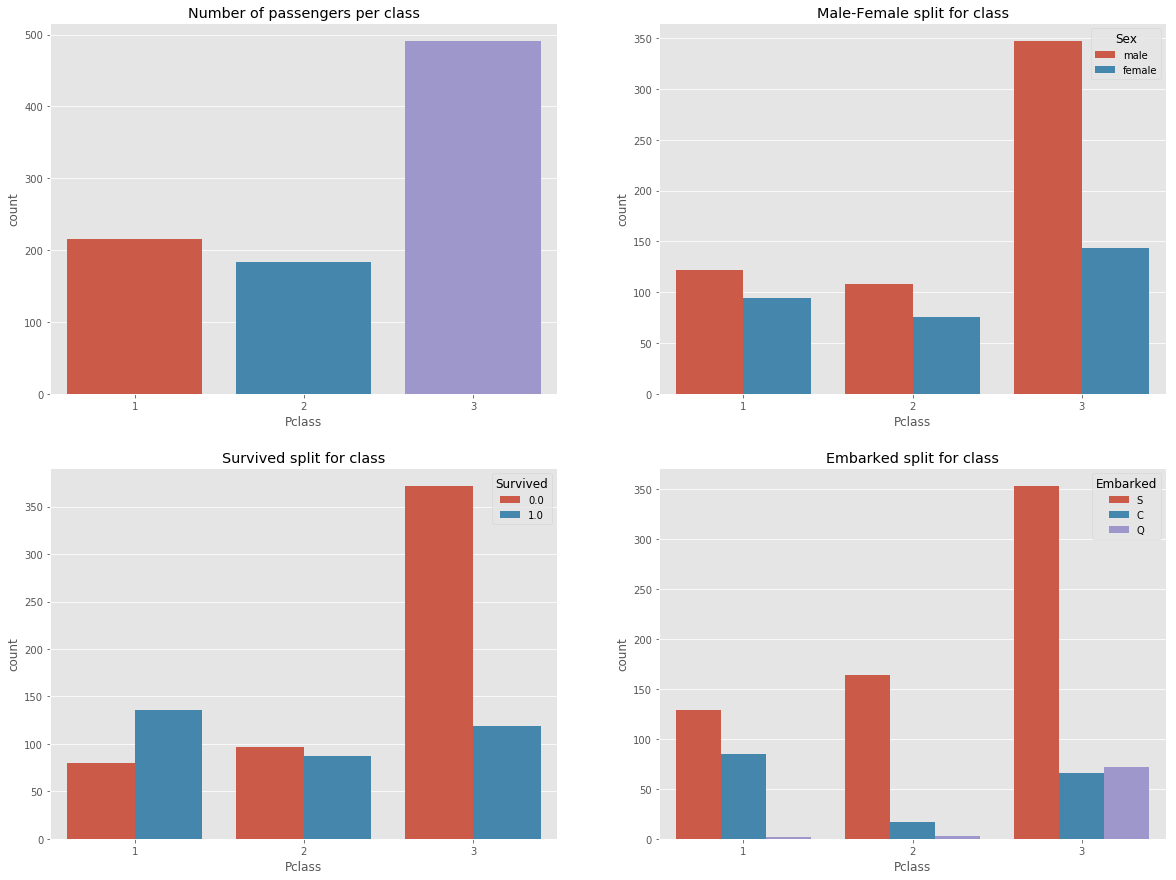

In [215]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Pclass', data=train_data, ax=ax[0,0])
ax[0,0].set_title('Number of passengers per class')

sns.countplot('Pclass', hue='Sex',data=train_data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for class')

sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[1,0])
ax[1,0].set_title('Survived split for class')

sns.countplot('Pclass', hue='Embarked', data=train_data, ax=ax[1,1])
ax[1,1].set_title('Embarked split for class')

plt.show()

Виждаме, че при първа класа, повечето са оцелели, докато при трета класа по-голямата част от хората са загинали, а във втора съотношението е около 50:50.
Също така забелязваме, че в Southampton са се качили доста от пътниците от трета класа.

## Sex

In [242]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

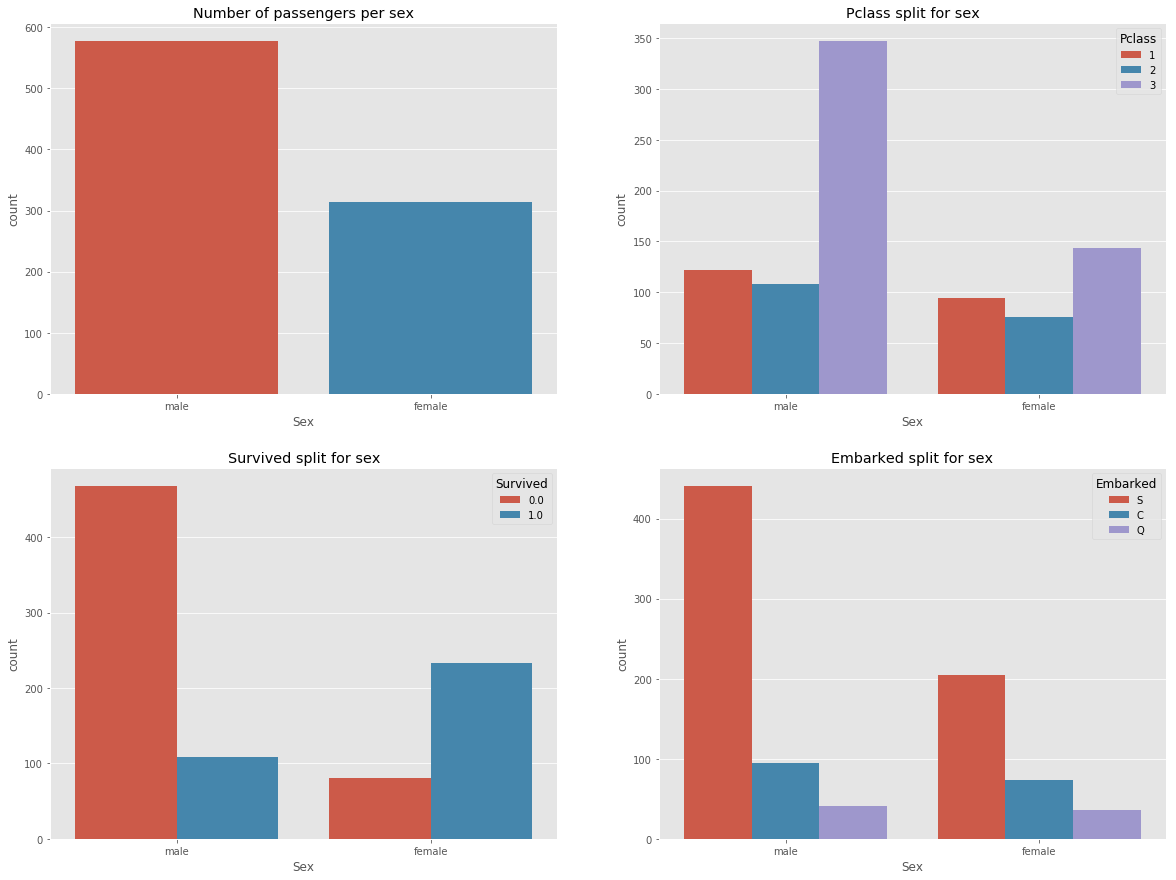

In [246]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Sex', data=train_data, ax=ax[0,0])
ax[0,0].set_title('Number of passengers per sex')

sns.countplot('Sex', hue='Pclass',data=train_data, ax=ax[0,1])
ax[0,1].set_title('Pclass split for sex')

sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1,0])
ax[1,0].set_title('Survived split for sex')

sns.countplot('Sex', hue='Embarked', data=train_data, ax=ax[1,1])
ax[1,1].set_title('Embarked split for sex')

plt.show()

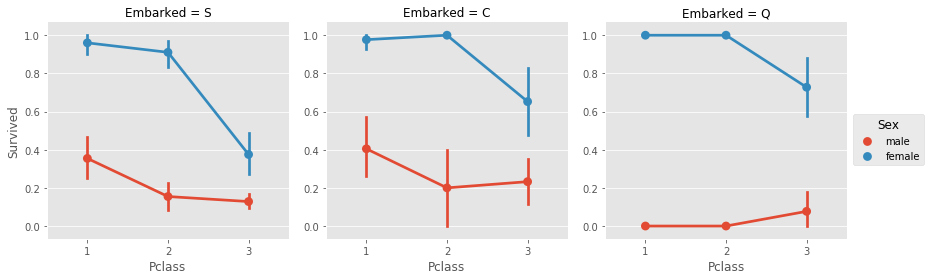

In [245]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train_data)
plt.show()

Виждаме че независимо от мястото от което са се качили, в коя класа пътуват, жените има значително по-голям шанс за оцеляване. 

## Embarked

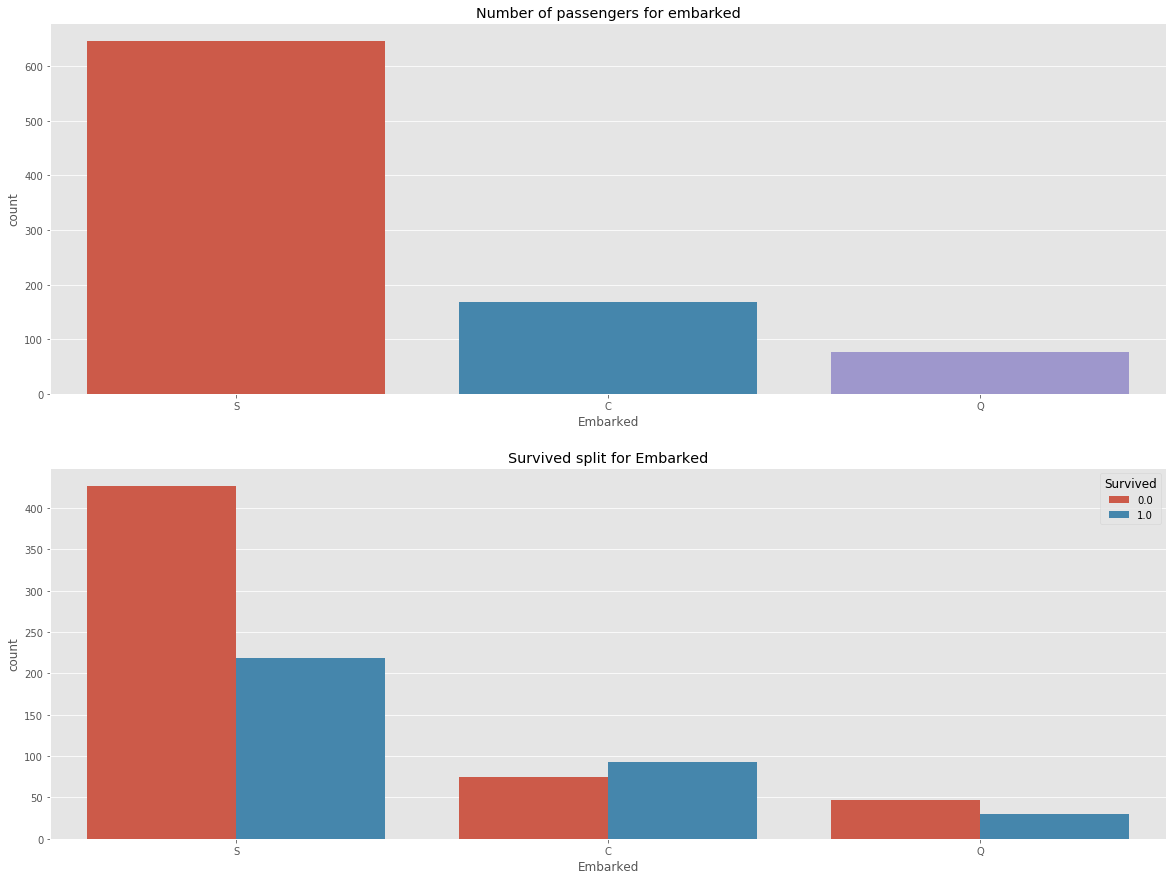

In [260]:
f,ax=plt.subplots(2,figsize=(20,15))

sns.countplot('Embarked', data=train_data, ax=ax[0])
ax[0].set_title('Number of passengers for embarked')


sns.countplot('Embarked', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived split for Embarked')

plt.show()

# Title

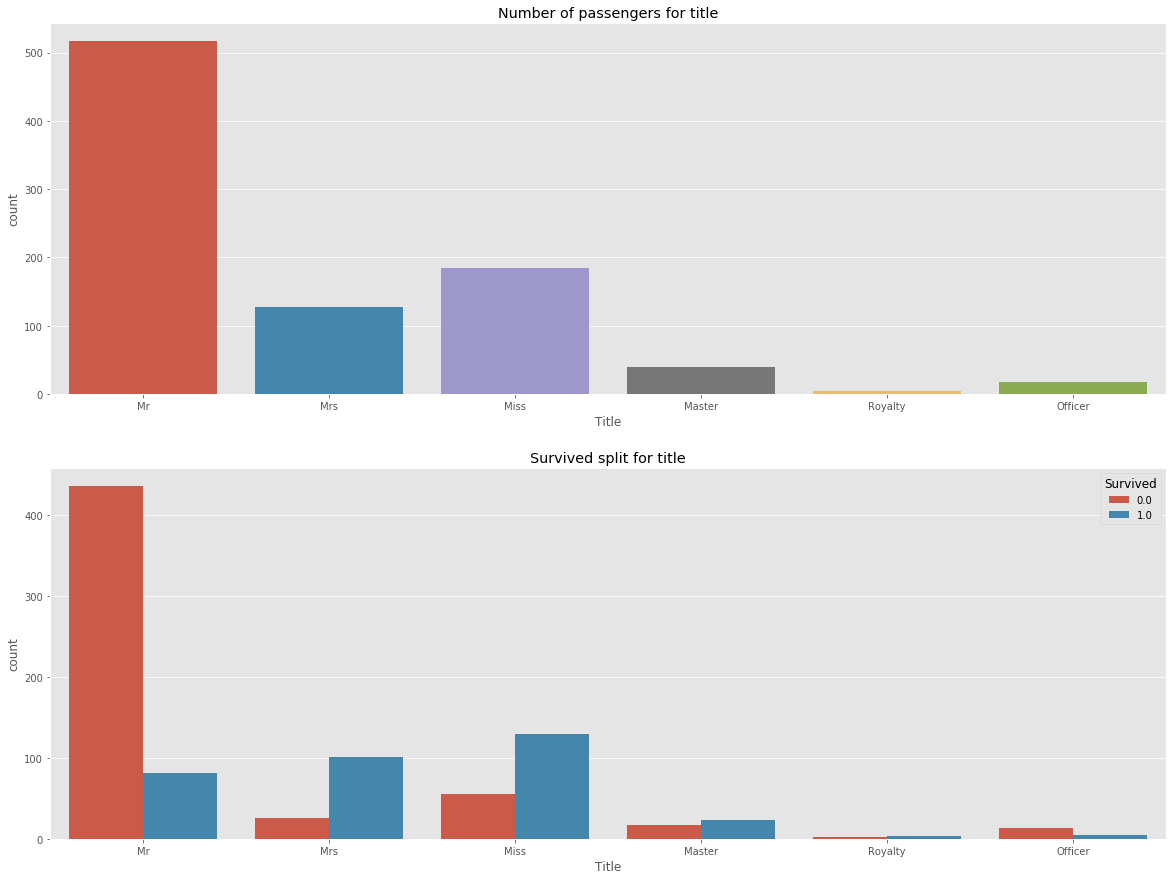

In [261]:
f,ax=plt.subplots(2,figsize=(20,15))

sns.countplot('Title', data=train_data, ax=ax[0])
ax[0].set_title('Number of passengers for title')


sns.countplot('Title', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived split for title')

plt.show()

# Feature engineering

## Използване на атрибута Cabin

Първата буква на кабината, указва на коя палуба се намира тя, а в зависимост дали номерът на кибината е четен или нечетен
се указва дали кабината е вляво или вдясно.

In [262]:
traino = train_data.copy()
cabinN = traino[~traino.Cabin.isnull()]['Cabin'].map(lambda c : str(c)[-1])
deck = traino[~traino.Cabin.isnull()]['Cabin'].map(lambda c : c[0])
left = cabinN.map(lambda c : c.isdigit() and int(c)%2 != 0)
right = cabinN.map(lambda c : c.isdigit() and int(c)%2 == 0)
left.name = 'Left'
right.name = 'Right'
deck.name = 'Deck'
traino = pd.concat([traino, left, right,deck], axis=1)

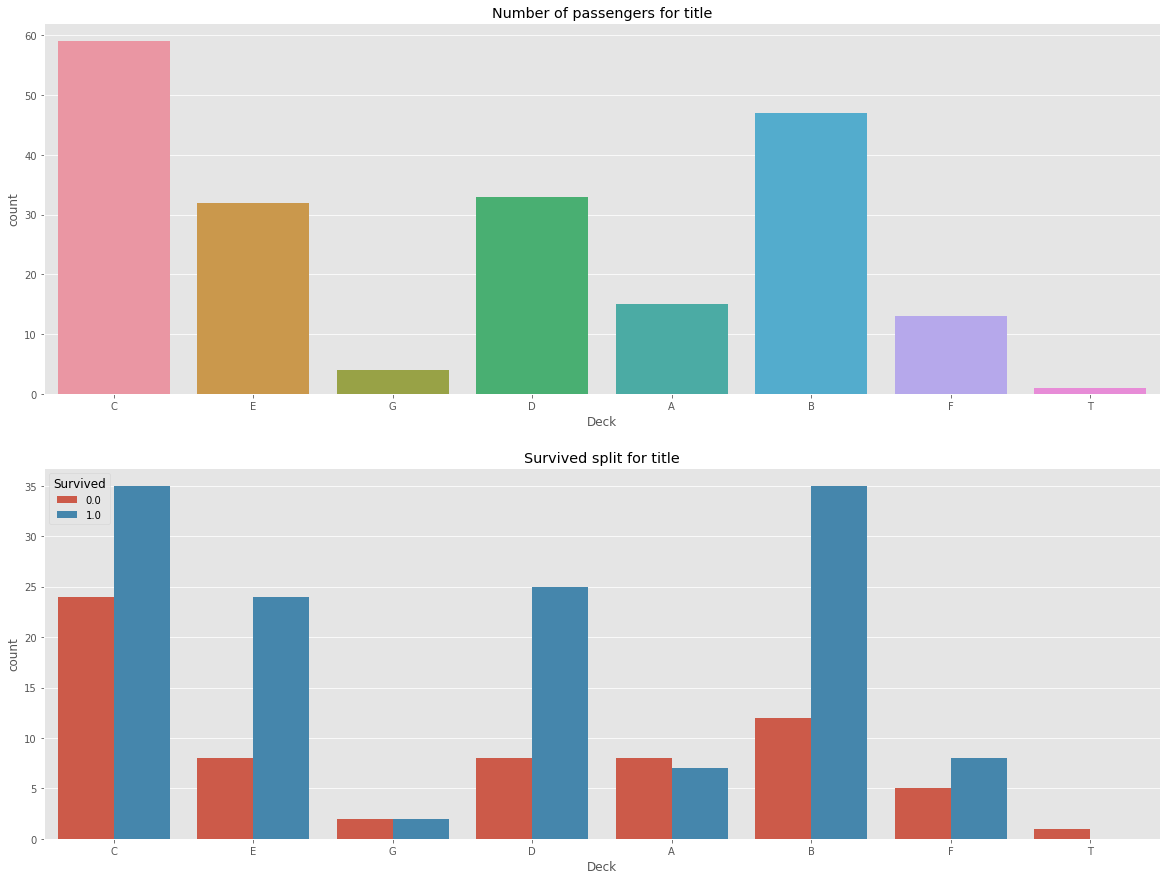

In [267]:
f,ax=plt.subplots(2,figsize=(20,15))

sns.countplot('Deck', data=traino, ax=ax[0])
ax[0].set_title('Number of passengers for title')


sns.countplot('Deck', hue='Survived', data=traino, ax=ax[1])
ax[1].set_title('Survived split for title')

plt.show()

In [270]:
copy_data = traino.copy()
df_embarked = pd.get_dummies(copy_data.Embarked)
copy_data = pd.concat([copy_data, df_embarked], axis=1)
copy_data.drop(['Embarked'], axis=1,inplace=True)
copy_data.head()
df_embarked = pd.get_dummies(copy_data.Sex)
copy_data = pd.concat([copy_data, df_embarked], axis=1)
copy_data.drop(['Sex'], axis=1,inplace=True)
copy_data.head()
df_embarked = pd.get_dummies(copy_data.Deck)
copy_data = pd.concat([copy_data, df_embarked], axis=1)
copy_data.drop(['Deck'], axis=1,inplace=True)
copy_data.head()
df_embarked = pd.get_dummies(copy_data.Title)
copy_data = pd.concat([copy_data, df_embarked], axis=1)
copy_data.drop(['Title'], axis=1,inplace=True)
copy_data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,...,female,male,A,B,C,D,E,F,G,T
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,...,0,1,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,0,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,...,1,0,0,0,0,0,0,0,0,0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,...,0,1,0,0,0,0,0,0,0,0


In [271]:
copy_data.drop(['Ticket', 'Fare', 'PassengerId', 'Name', 'Cabin'], axis=1,inplace=True)

In [278]:
copy_data.Left = copy_data.Left.fillna(0)
copy_data.Right = copy_data.Right.fillna(0)
copy_data.isnull().sum()

Age         0
Parch       0
Pclass      0
SibSp       0
Survived    0
Left        0
Right       0
C           0
Q           0
S           0
female      0
male        0
A           0
B           0
C           0
D           0
E           0
F           0
G           0
T           0
Master      0
Miss        0
Mr          0
Mrs         0
Officer     0
Royalty     0
dtype: int64

In [282]:
copy_data.head()

,Age,Parch,Pclass,SibSp,Survived,Left,Right,C,Q,S,...,E,F,G,T,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,0,3,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38.0,0,1,1,1.0,True,False,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,35.0,0,1,1,1.0,True,False,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,35.0,0,3,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [292]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

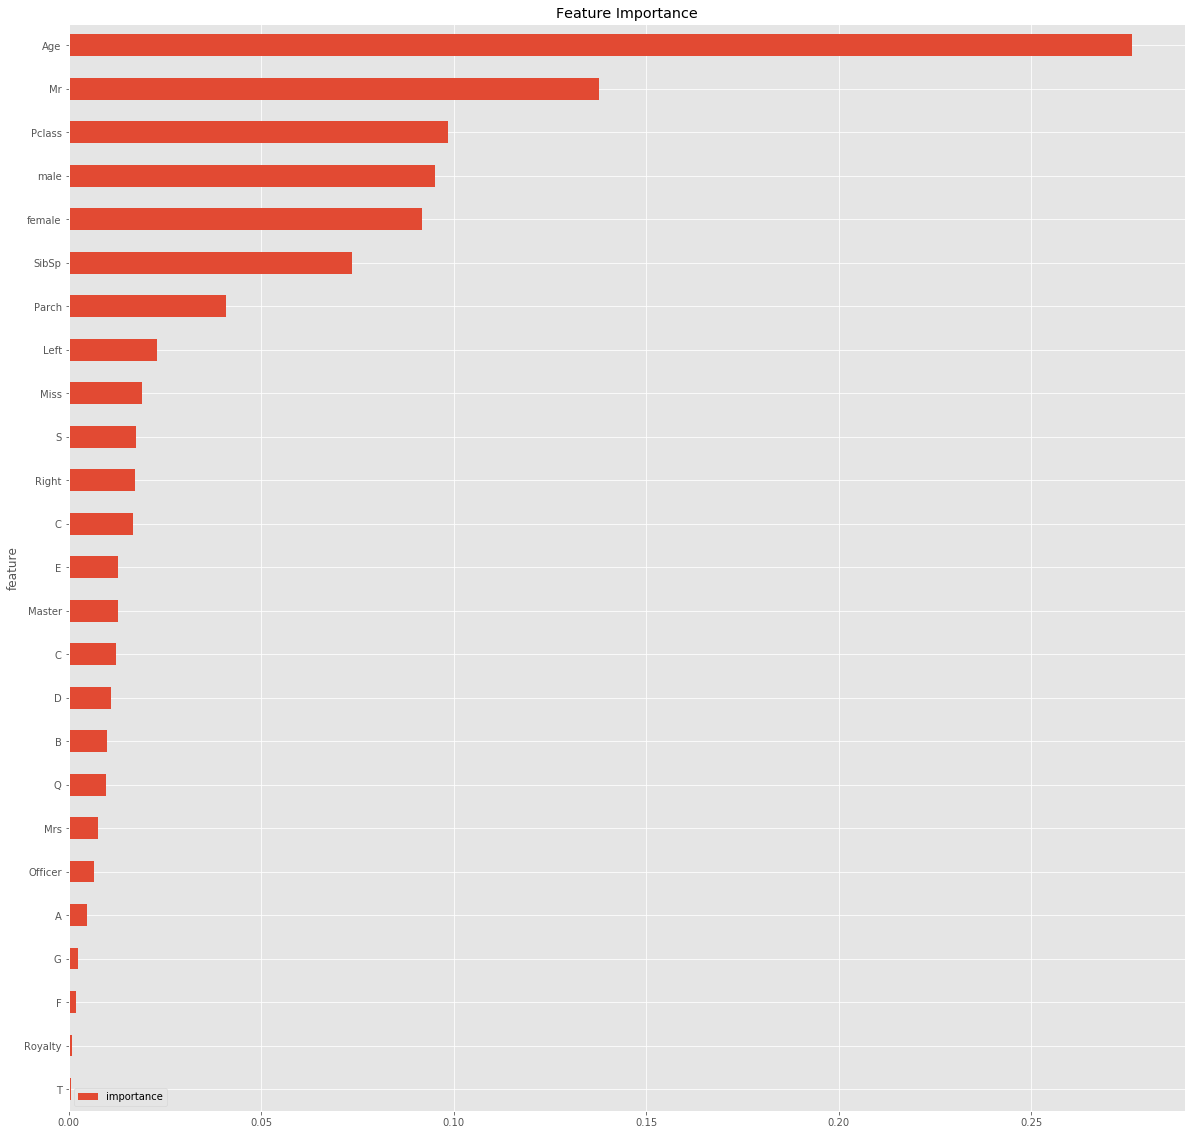

In [448]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(copy_data.drop('Survived', axis=1), copy_data.loc[:,'Survived'])


features = pd.DataFrame()
features['feature'] = copy_data.drop('Survived', axis=1).columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)



features.plot(kind='barh', figsize=(20, 20))
plt.title("Feature Importance")
plt.show()


# Трениране на модел и избор на хиперпараметри

In [392]:
random_forest_model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

parameter_grid = {
                'random_state':[2],
                 'max_depth' : [2, 4, 5, 6, 7,8],
                 'n_estimators': [10, 30,40,50,60, 70],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [5, 7, 13],
                 'min_samples_leaf': [5, 7, 13],
                 'bootstrap': [True, False],
                 }
param_grid=parameter_grid,
#search = GridSearchCV(random_forest_model, {'n_estimators': [10, 30,40,50, 70, 100, 150],
#                              'max_depth': [2, 4, 5, 6, 8, 10, 12, 15,20]})

search =  GridSearchCV(random_forest_model,scoring='accuracy',
                               param_grid=parameter_grid
                              )
search.fit(copy_data.drop('Survived', axis=1), copy_data.loc[:,'Survived'])
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\ut

,rank_test_score,mean_test_score,params
1527,1,0.829405,"{'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 50, 'random_state': 2}"
1473,1,0.829405,"{'bootstrap': False, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 50, 'random_state': 2}"
1847,3,0.828283,"{'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 70, 'random_state': 2}"
1521,3,0.828283,"{'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 50, 'random_state': 2}"
1900,3,0.828283,"{'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 60, 'random_state': 2}"
1528,3,0.828283,"{'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 60, 'random_state': 2}"
1894,3,0.828283,"{'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60, 'random_state': 2}"
1515,3,0.828283,"{'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 2}"
875,3,0.828283,"{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 70, 'random_state': 2}"
869,3,0.828283,"{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70, 'random_state': 2}"


In [369]:
train,test  = train_test_split(copy_data, test_size=0.3, random_state=0, stratify=copy_data['Survived'])
train_X = train.drop('Survived', axis=1)
train_Y = train.loc[:,'Survived']
test_X = test.drop('Survived', axis=1)
test_Y = test.loc[:,'Survived']
X = copy_data.drop('Survived', axis=1)
y = copy_data.loc[:,'Survived']

SyntaxError: keyword argument repeated (<ipython-input-369-a0d1c7b026af>, line 1)

In [429]:
#parameters = {'random_state':2, 'bootstrap': True, 'min_samples_leaf': 5, 'n_estimators': 70, 
#                  'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 7}
parameters = {'random_state':2, 'bootstrap': True, 'min_samples_leaf': 5, 'n_estimators': 70, 
                  'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 7}
#random_forest_model = RandomForestClassifier(random_state = 2, max_features='log2', max_depth =7, n_estimators=150)
random_forest_model = RandomForestClassifier(**parameters)
random_forest_model.fit(train_X, train_Y)
prediction = random_forest_model.predict(train_X)
print('The accuracy of the Random Forests with train data is',metrics.accuracy_score(prediction,train_Y))
prediction = random_forest_model.predict(test_X)
print('The accuracy of the Random Forests with test data is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Random Forests with train data is 0.83467094703
The accuracy of the Random Forests with test data is 0.820895522388


# Трениране на модел с всичките тренировъчни данни и предсказване на тестовите данни

In [349]:
test_data_copy = combined.iloc[891:]
test_data_copy.shape
 

(418, 13)

In [357]:
cabinN = test_data_copy[~test_data_copy.Cabin.isnull()]['Cabin'].map(lambda c : str(c)[-1])
deck = test_data_copy[~test_data_copy.Cabin.isnull()]['Cabin'].map(lambda c : c[0])
left = cabinN.map(lambda c : c.isdigit() and int(c)%2 != 0)
right = cabinN.map(lambda c : c.isdigit() and int(c)%2 == 0)
left.name = 'Left'
right.name = 'Right'
deck.name = 'Deck'
test_data_copy = pd.concat([test_data_copy, left, right,deck], axis=1)

test_data_copy = test_data_copy.copy()
df_embarked = pd.get_dummies(test_data_copy.Embarked)
test_data_copy = pd.concat([test_data_copy, df_embarked], axis=1)
test_data_copy.drop(['Embarked'], axis=1,inplace=True)
test_data_copy.head()
df_embarked = pd.get_dummies(test_data_copy.Sex)
test_data_copy = pd.concat([test_data_copy, df_embarked], axis=1)
test_data_copy.drop(['Sex'], axis=1,inplace=True)
test_data_copy.head()
df_embarked = pd.get_dummies(test_data_copy.Deck)
test_data_copy = pd.concat([test_data_copy, df_embarked], axis=1)
test_data_copy.drop(['Deck'], axis=1,inplace=True)
test_data_copy.head()
df_embarked = pd.get_dummies(test_data_copy.Title)
test_data_copy = pd.concat([test_data_copy, df_embarked], axis=1)
test_data_copy.drop(['Title'], axis=1,inplace=True)
test_data_copy.head()

test_data_copy.Left = test_data_copy.Left.fillna(0)
test_data_copy.Right = test_data_copy.Right.fillna(0)
test_data_copy.isnull().sum()

test_data_copy.drop(['Ticket', 'Fare', 'PassengerId', 'Name', 'Cabin'], axis=1,inplace=True)

In [358]:
set( set(copy_data.iloc[:,1:].columns) - set(test_data_copy.columns))


{'T'}

In [444]:
random_forest_model = RandomForestClassifier(**parameters)
random_forest_model.fit(copy_data.drop(['Survived','T'], axis=1), copy_data.loc[:,'Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [445]:
prediction = random_forest_model.predict(test_X.drop(['T'], axis=1))
print('The accuracy of the Random Forests with test data is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Random Forests with test data is 0.85447761194


In [447]:
predictionTest = random_forest_model.predict(test_data_copy.drop(['Survived'], axis=1))
predictionTest = [int(i) for i in predictionTest]
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('file:///D:/Machine Learning/Kaggle/Titanic/test.csv').PassengerId,
    'Survived': predictionTest
})
frame = frame.set_index('PassengerId')
frame.to_csv('~/Desktop/predictions.csv')
frame.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


# Краен резултат:

След доста играчка с най-различни комбинации от feature и хиперпарамтери,след 20 предавания в Kaggle беше достигнато заветното 0.79425, така че мисията е изпълнена :D

https://www.kaggle.com/simeonsg